<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Power Transformer
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
• The PowerTransformer in machine learning is a preprocessing technique available in libraries like Scikit-learn. 
<br>
• It applies power transformations to make data more Gaussian-like, which can improve the performance of many machine learning algorithms.
<br>
• The two common methods available in PowerTransformer are Box-Cox and Yeo-Johnson transformations.
<br>
<br>
<strong>Parameters of PowerTransformer</strong>
<br>
• method : Specifies the transformation method to use. It can be either :
<br>
-> box-cox : Only works with strictly positive data.
<br>
-> yeo-johnson : Works with both positive and negative data.
<br>
• standardize : Indicates whether to standardize the transformed data to have zero mean and unit variance. 
<br>
-> If True, after transformation the output will be standardized.
</div>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Setting theme for plots
sns.set_theme("notebook")

In [3]:
# Reading CSV File
df = pd.read_csv("concrete.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Shape of the DataFrame
df.shape

(1030, 9)

In [5]:
# Null values in the DataFrame
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Train Test Split</strong>
<br>
The train-test split is a common technique in machine learning for evaluating model performance. It involves dividing your dataset into two parts :
<br>
• Training Set : Used to train the model.
<br>
• Testing Set : Used to evaluate the model's performance on unseen data.
<br>
<br>
<strong>Parameters</strong>
<br>
• arrays : This can be a list or a tuple of arrays (e.g, features and target variables).
<br>
• test_size : Determines the proportion of the dataset to include in the test split (e.g, 0.2 for 20%).
<br>
• random_state : Controls the shuffling applied to the data before the split (e.g., any integer).
<br>
• shuffle : A boolean that indicates whether to shuffle the data before splitting.
</div>

In [6]:
# Defining Features and Target Variables
X = df.iloc[:,0:8]
y = df["Strength"]

In [7]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [8]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [9]:
# Custom function to compare
# Distribution and QQPlot of all columns
def dist_vs_qq(*columns):
    for col in columns:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        sns.histplot(X_train[col], kde=True)
        plt.title(f'Distribution of {col} Column')
        plt.subplot(1,2,2)
        stats.probplot(X_train[col], dist="norm", plot=plt)
        plt.title(f'QQPlot of {col} Column')
        plt.show()

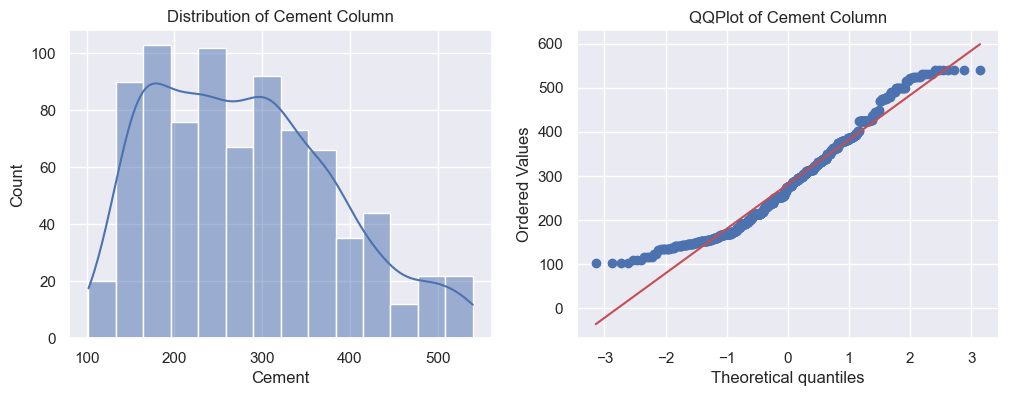

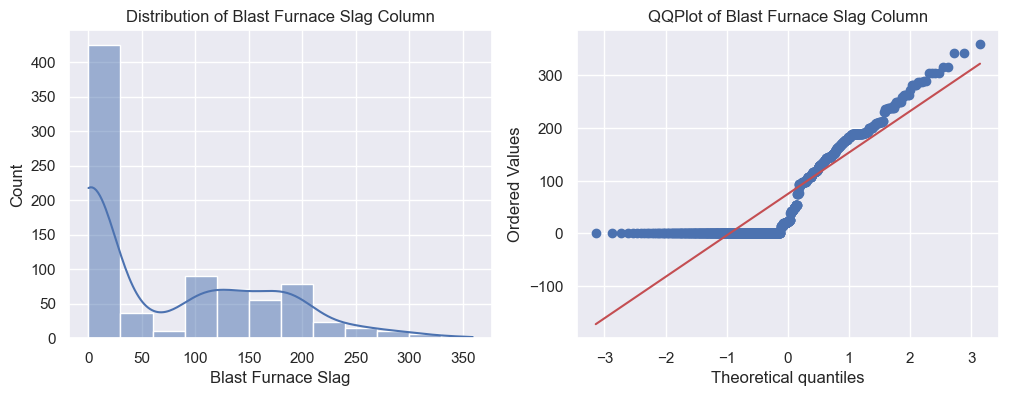

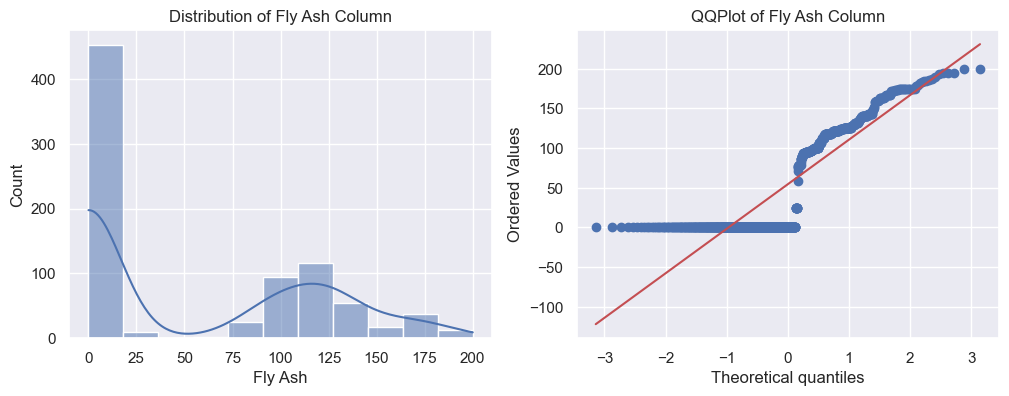

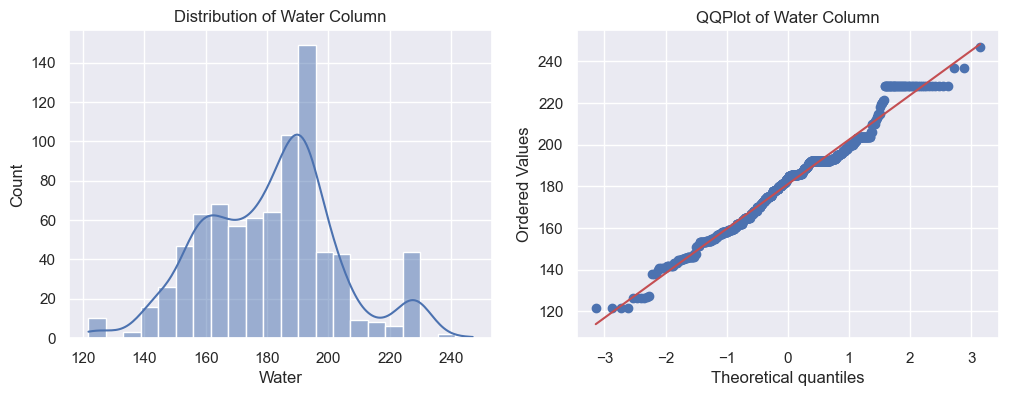

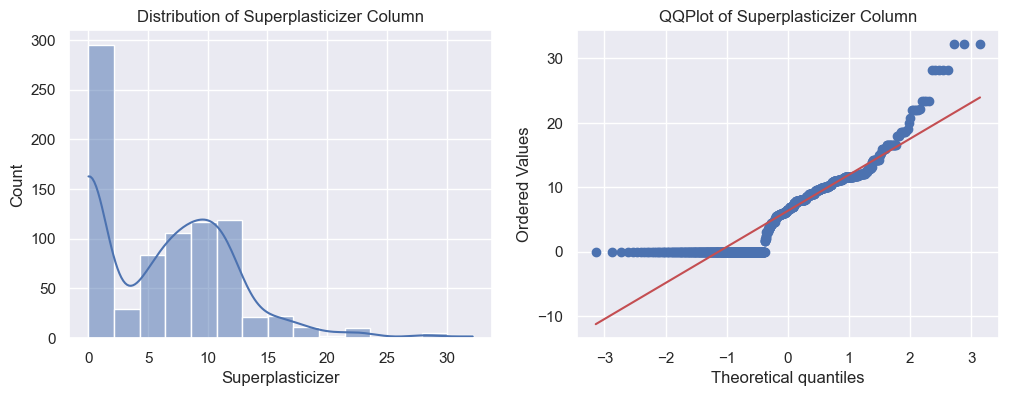

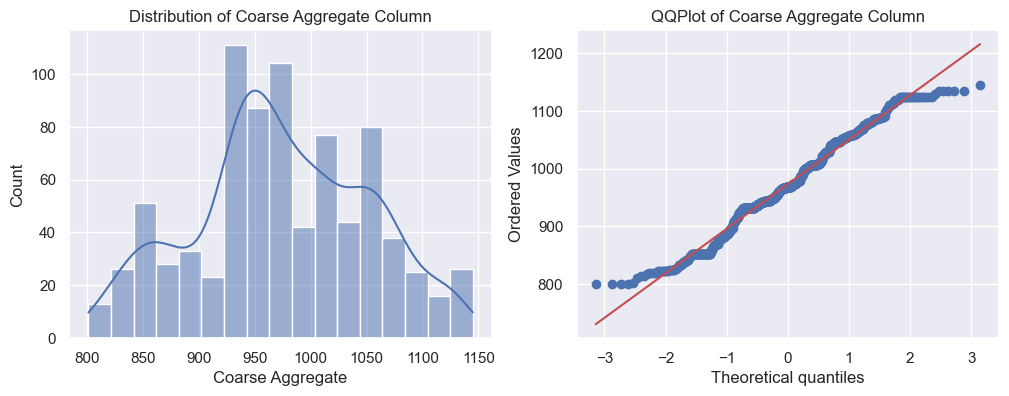

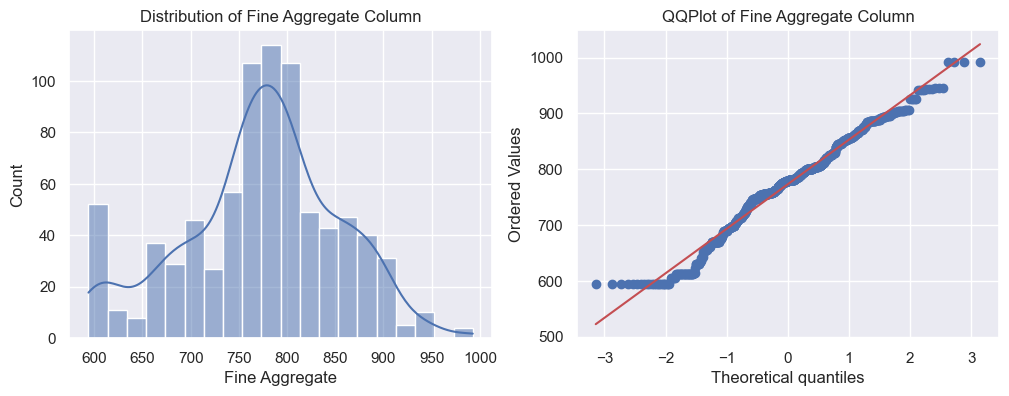

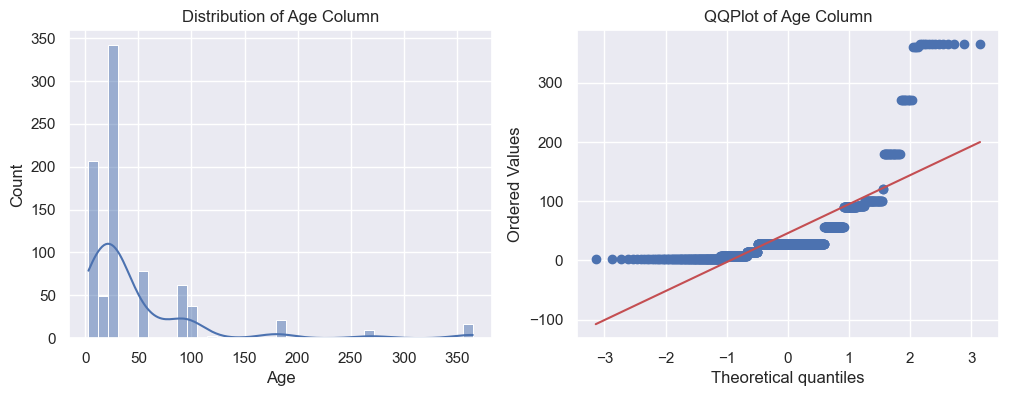

In [10]:
# For all columns
dist_vs_qq('Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age')

In [11]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [12]:
# Creating LinearRegression Object for Original Data
lr1 = LinearRegression()

In [13]:
# Fitting the model on Original Data
lr1.fit(X_train, y_train)

LinearRegression()

In [14]:
# Prediction for Original Data
y_pred = lr1.predict(X_test)

In [15]:
# Importing r2_score
from sklearn.metrics import r2_score

In [16]:
# r2_score for Original Data
r2_score(y_test, y_pred)

0.6359646484072217

In [17]:
# Importing cross_val_score
from sklearn.model_selection import cross_val_score

In [18]:
# cross_val_score on Original Data
print(f'CrossValScore : {np.mean(cross_val_score(lr1, X_train, y_train, scoring='r2'))}')

CrossValScore : 0.5977821812124504


<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Box-Cox Transformation</strong>
<br>
<strong>Purpose</strong>
<br>
• The Box-Cox transformation is designed to stabilize variance and make the data more normally distributed. 
<br>
• This can improve the performance of various statistical techniques and machine learning algorithms that assume normality.
<br>
<strong>Mathematical Formula</strong>
<br>
• The Box-Cox transformation is defined as follows:
    
$$y' = 
\begin{cases} 
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ 
\log(y) & \text{if } \lambda = 0 
\end{cases}
$$
where:
<br>
• $y$ is the original data point.
<br>
• $y'$ is the transformed data point.
<br>
• $\lambda$ is the transformation parameter that is estimated from the data.
<br>
<strong>Note</strong>
<br>
• The Box-Cox transformation can only be applied to positive values of $y$ (i.e. $y > 0$). 
<br>
<br>

---

<br>
<strong>Yeo-Johnson Transformation</strong>
<br>
<strong>Purpose</strong>
<br>
• The Yeo-Johnson transformation is an extension of the Box-Cox transformation that allows for the transformation of data that includes zero and negative values. 
<br>
• It also aims to stabilize variance and normalize data.
<br>
<strong>Mathematical Formula</strong>
<br>
• The Yeo-Johnson transformation is defined as follows:

$$y' = 
\begin{cases} 
\frac{(y + 1)^\lambda - 1}{\lambda} & \text{if } y \geq 0 \\ 
-\frac{(-y + 1)^{2 - \lambda} - 1}{2 - \lambda} & \text{if } y < 0 
\end{cases}
$$
where:
<br>
• $y$ is the original data point.
<br>
• $y'$ is the transformed data point.
<br>
• $\lambda$ is the transformation parameter.
<br>
<strong>Note</strong>
<br>
• The Yeo-Johnson transformation is applicable to all real values (positive, negative, zero).
</div>

In [19]:
# Importing ColumnTransformer
from sklearn.compose import ColumnTransformer

In [20]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [21]:
# Creating ColumnTransformer Object
ctf = ColumnTransformer(transformers=[
    ('PowerTransformer', PowerTransformer(method='box-cox'), ['Blast Furnace Slag','Fly Ash','Superplasticizer','Age'])
], remainder='passthrough')

In [49]:
# Detail of applied transformers
ctf.named_transformers_

{'PowerTransformer': PowerTransformer(method='box-cox'),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [48]:
# Querying any transformer with its name
# You can also access attributes of that transformer
ctf.named_transformers_['PowerTransformer'].lambdas_

array([ 0.03220067, -0.0371883 ,  0.12999698,  0.04659862])

In [25]:
# Fitting box_cox on Training Data
# Box-Cox is not applicable to 0s
# So we add a little value to Training and Testing Set, so that it never get equal to 0
X_train_transformed_1 = ctf.fit_transform(X_train+0.00001)

In [26]:
# Transforming the Testing Data
X_test_transformed_1 = ctf.transform(X_test+0.00001)

In [27]:
# DataFrame with columns and their lambda values
# With lambdas_ attribute of power_transformer 
# You can get the optimal value of lambda used for transformation
dict = {'columns':['Blast Furnace Slag','Fly Ash','Superplasticizer','Age'],
       'lambda':ctf.named_transformers_["PowerTransformer"].lambdas_}
pd.DataFrame(dict)

,columns,lambda
0,Blast Furnace Slag,0.032201
1,Fly Ash,-0.037188
2,Superplasticizer,0.129997
3,Age,0.046599


In [28]:
# Creating LinearRegression Object for Transformed Data
lr2 = LinearRegression()

In [29]:
# Fitting the model on Transformed Data
lr2.fit(X_train_transformed_1, y_train)

LinearRegression()

In [30]:
# Prediction for Transformed Data
y_pred_transformed_1 = lr2.predict(X_test_transformed_1)

In [31]:
# r2_score for Transformed Data
r2_score(y_test, y_pred_transformed_1)

0.8108143239071728

In [32]:
# cross_val_score on Transformed Data
print(f'CrossValScore : {np.mean(cross_val_score(lr2, X_train_transformed_1, y_train, scoring='r2'))}')

CrossValScore : 0.7910703531891213


In [33]:
# After Transformation PowerTransformer/FunctionTransformer both retuns array
# So we change it to DataFrame from our ease and efficient use of Transformed Data
X_train_transformed_1 = pd.DataFrame(X_train_transformed_1, columns=X_train.columns)
X_test_transformed_1 = pd.DataFrame(X_test_transformed_1, columns=X_test.columns)

In [34]:
# Custom function to compare
# Distribution before and after Transformation
def change_dist(*columns):
    for col in columns:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        sns.histplot(X_train[col], kde=True)
        plt.title(f'Distribution before Transformation of {col} Column')
        plt.subplot(1,2,2)
        sns.histplot(X_train_transformed_1[col], kde=True)
        plt.title(f'Distribution after Transformation of {col} Column')
        plt.show()

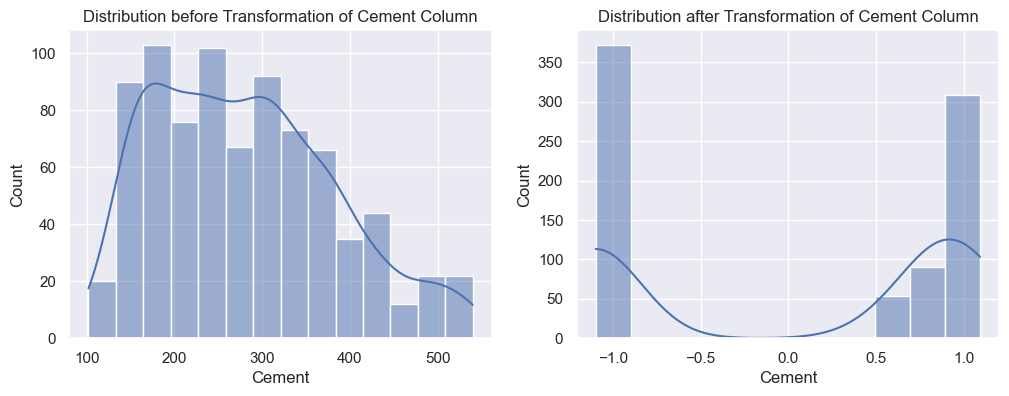

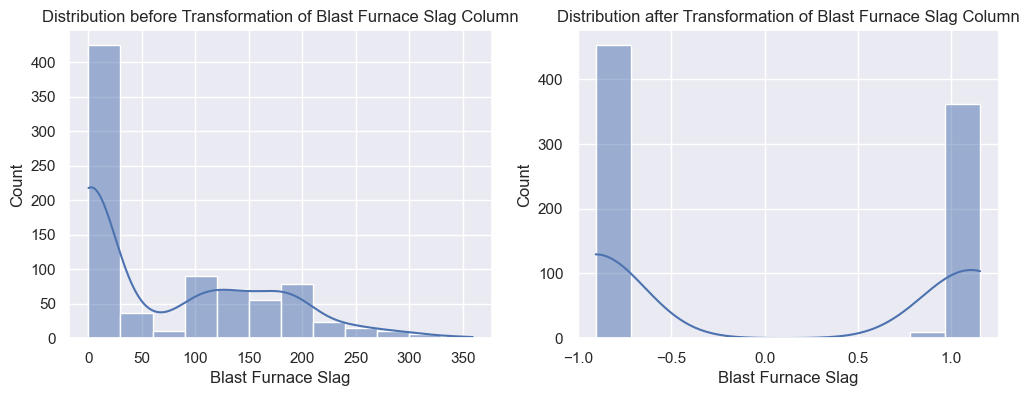

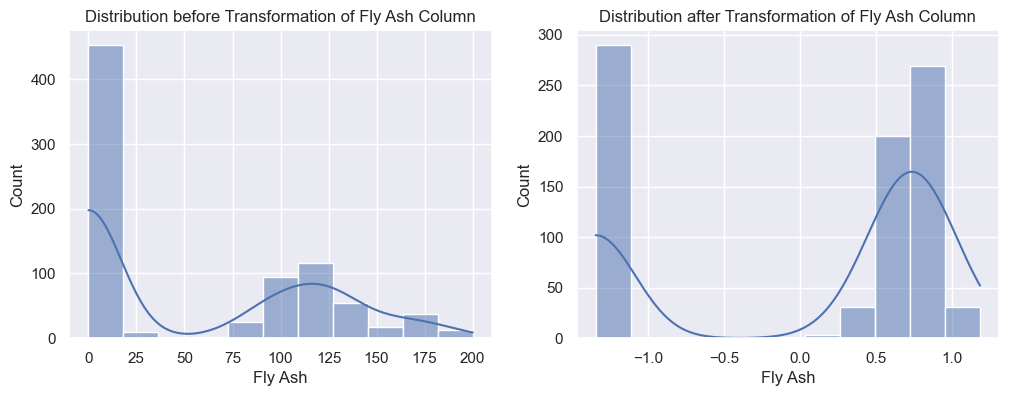

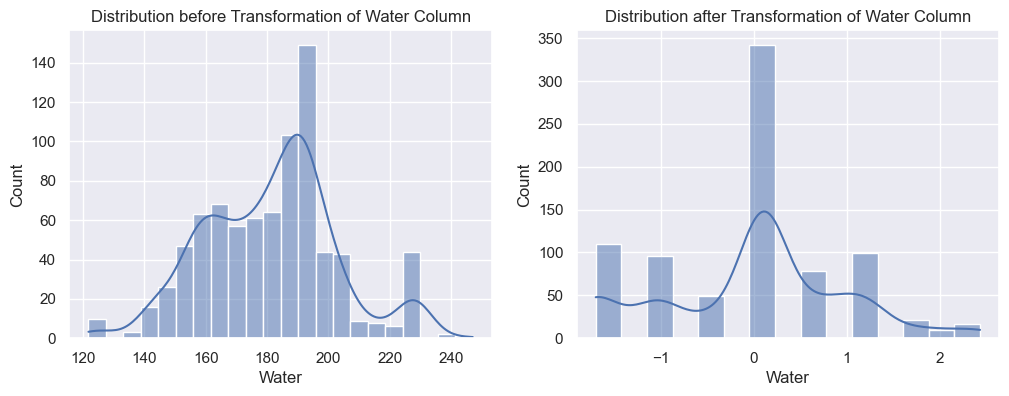

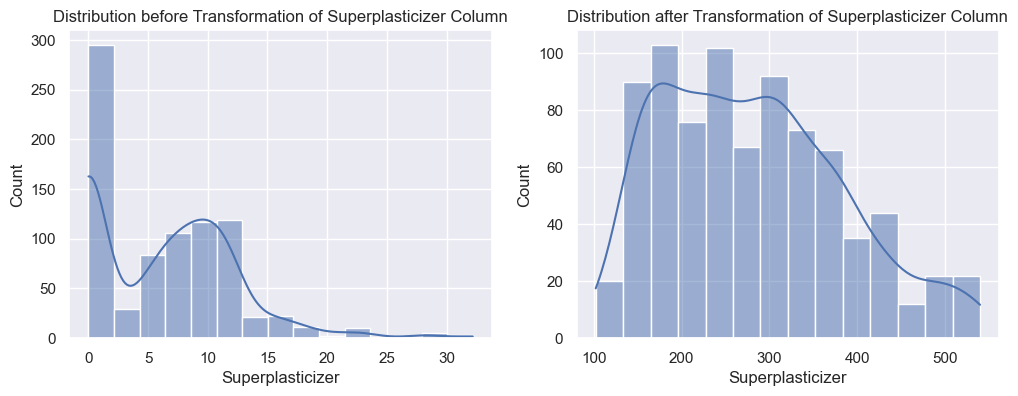

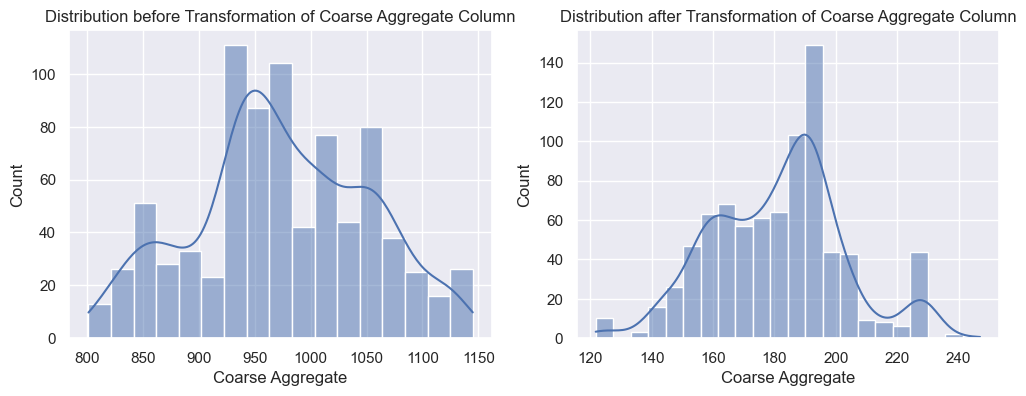

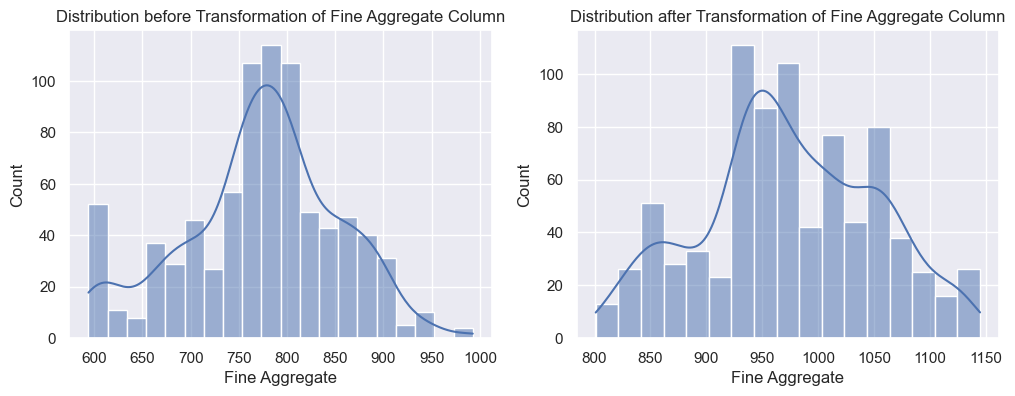

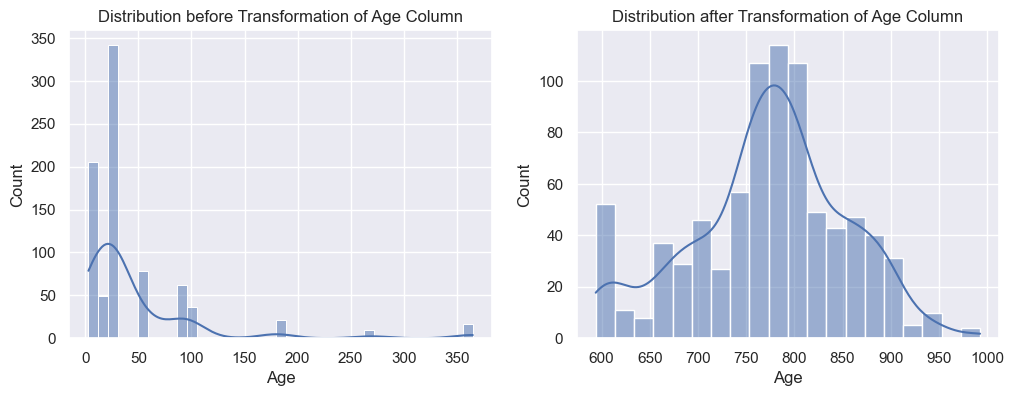

In [35]:
# For all columns
change_dist('Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age')

In [36]:
# Creating Yeo-Johnson Object
# If we don't pass any method to PowerTransformer
# It's default value is Yeo-Johnson
pt2 = PowerTransformer()

In [37]:
# Fitting Yeo-Johnson on Training Data
X_train_transformed_2 = pt2.fit_transform(X_train)

In [38]:
# Transforming the Testing Data
X_test_transformed_2 = pt2.transform(X_test)

In [39]:
# DataFrame with columns and their lambda values
dict = {'columns':X_train.columns,
       'lambda':pt2.lambdas_}
pd.DataFrame(dict)

,columns,lambda
0,Cement,0.200454
1,Blast Furnace Slag,0.027787
2,Fly Ash,-0.135483
3,Water,0.739004
4,Superplasticizer,0.300898
5,Coarse Aggregate,1.082710
6,Fine Aggregate,1.798116
7,Age,0.001277


In [40]:
# Creating LinearRegression Object for Transformed Data
lr3 = LinearRegression()

In [41]:
# Fitting the model on Transformed Data
lr3.fit(X_train_transformed_2, y_train)

LinearRegression()

In [42]:
# Prediction for Transformed Data
y_pred_transformed_2 = lr3.predict(X_test_transformed_2)

In [43]:
# r2_score for Transformed Data
r2_score(y_test, y_pred_transformed_2)

0.8122326175324109

In [44]:
# cross_val_score on Transformed Data
print(f'CrossValScore : {np.mean(cross_val_score(lr3, X_train_transformed_2, y_train, scoring='r2'))}')

CrossValScore : 0.7967782296006277


In [45]:
# After Transformation PowerTransformer/FunctionTransformer both retuns array
# So we change it to DataFrame from our ease and efficient use of Transformed Data
X_train_transformed_2 = pd.DataFrame(X_train_transformed_2, columns=X_train.columns)
X_test_transformed_2 = pd.DataFrame(X_test_transformed_2, columns=X_test.columns)

In [46]:
# Custom function to compare
# Distribution before and after Transformation
def change_dist(*columns):
    for col in columns:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        sns.histplot(X_train[col], kde=True)
        plt.title(f'Distribution before Transformation of {col} Column')
        plt.subplot(1,2,2)
        sns.histplot(X_train_transformed_2[col], kde=True)
        plt.title(f'Distribution after Transformation of {col} Column')
        plt.show()

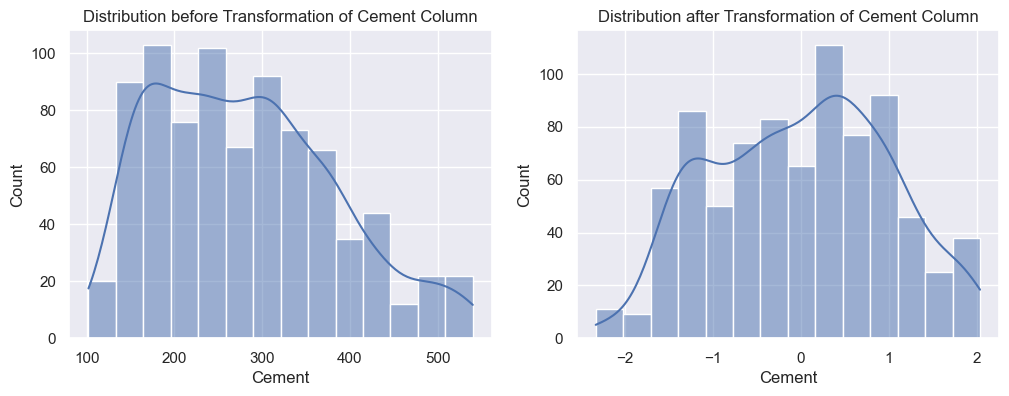

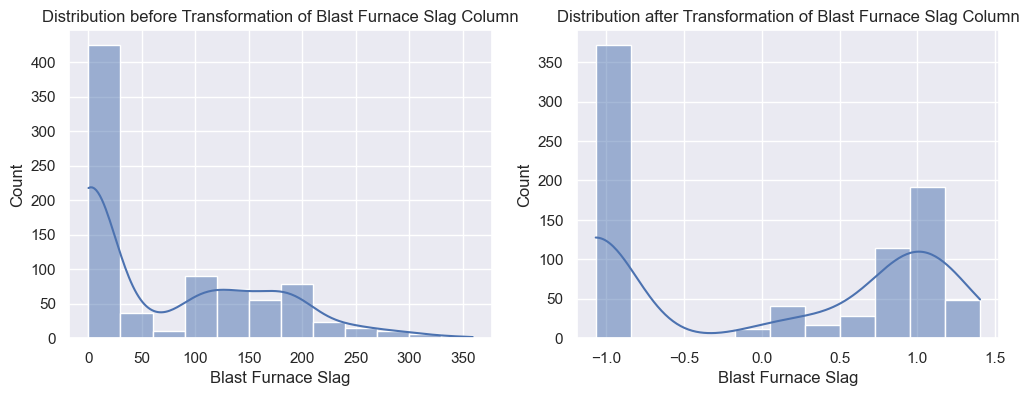

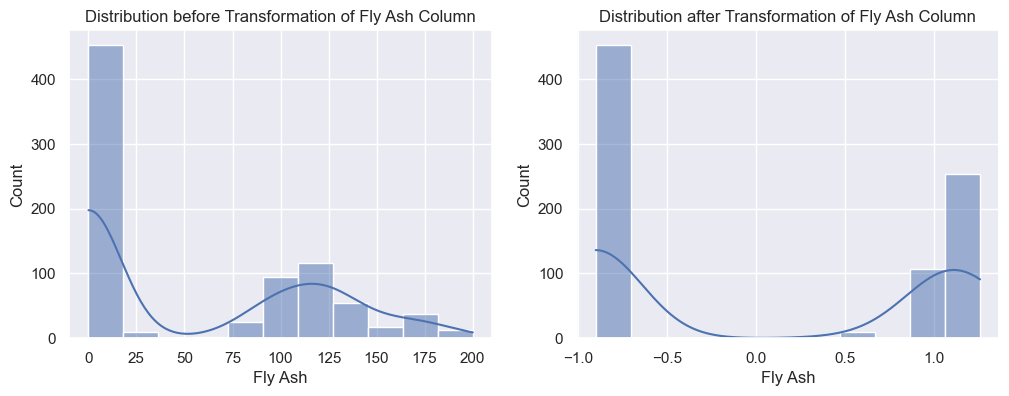

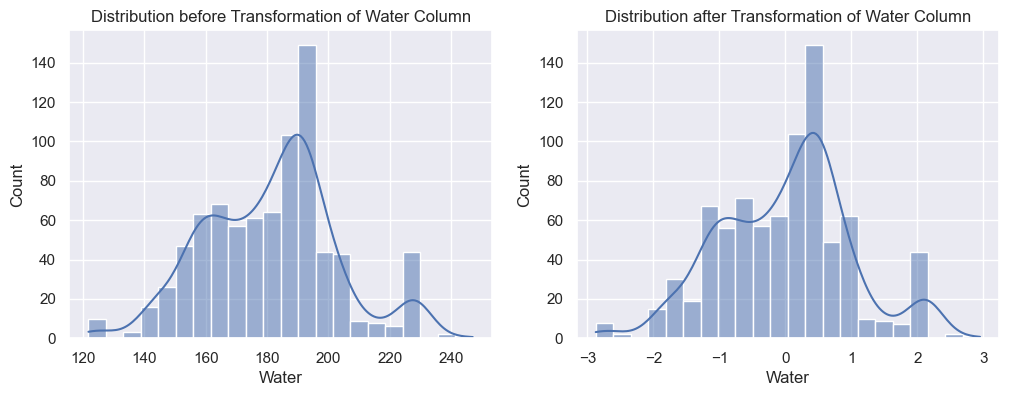

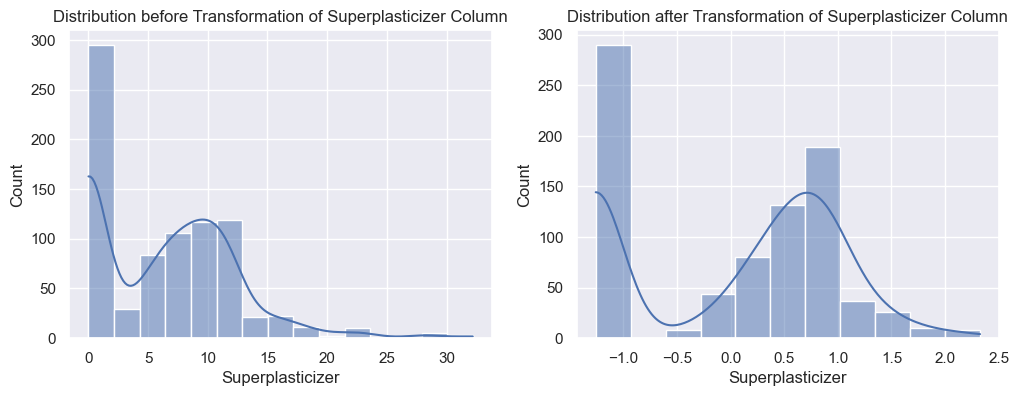

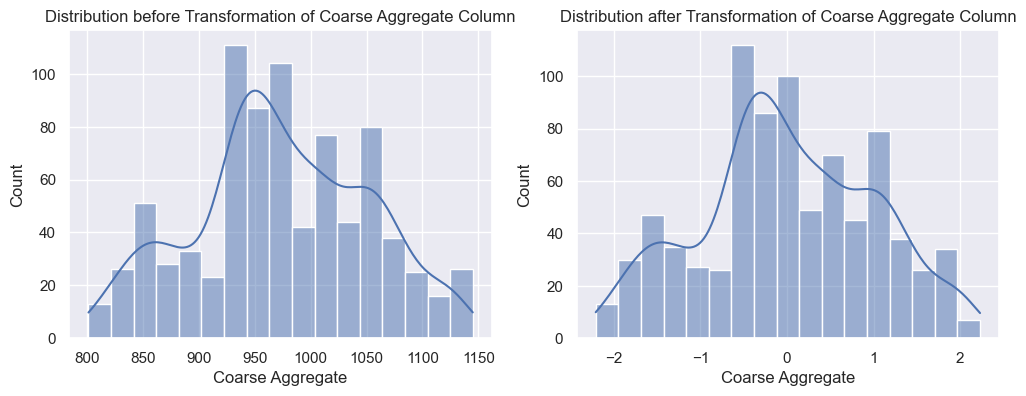

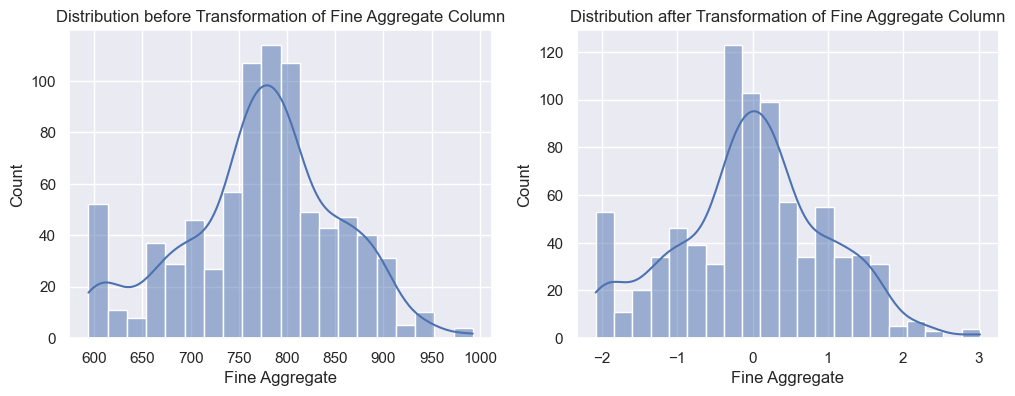

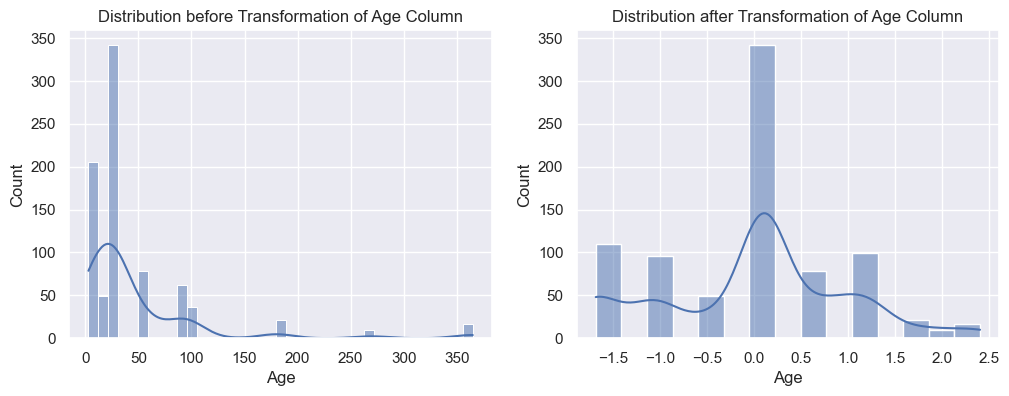

In [47]:
# For all columns
change_dist('Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age')